In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Loss vs dataset size

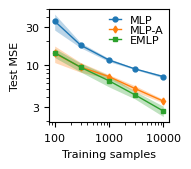

In [2]:
fig, ax = plt.subplots(1,1, figsize=(2, 1.8))

model_names = ["MLP", "MLP-A", "EMLP"]
training_samples = [100, 300, 1000, 3000, 10000]

data = np.load("data_for_figures/loss_vs_dataset_size.npz")

for i, model_name in enumerate(model_names):
    mean = data[model_name][0]
    std  = data[model_name][1]
    ax.plot(
        training_samples, 
        mean, 
        label=model_name, 
        marker=["o", "d", "s"][i], 
        color=["C0", "C1", "C2"][i], 
        linestyle=["-", "-", "-"][i], 
        markersize=3.5, linewidth=1
    )
    ax.fill_between(
        training_samples, 
        mean-2*std, 
        mean+2*std,
        color=["C0", "C1", "C2"][i], 
        alpha=0.3, 
        linewidth=0
    )

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xticks(training_samples, training_samples)
ax.set_xticks((100, 1000, 10000), ("$100$", "$1000$", "$10000$"), fontsize=8)
ax.set_xlabel("Training samples", fontsize=8)
ax.set_ylabel("Test MSE", fontsize=8)
ax.set_yticks((3e-3, 1e-2, 3e-2), ("3", "10", "30"), fontsize=8)
ax.legend(ncols=1, loc="upper right", borderpad=0, labelspacing=0, handlelength=1, fontsize=8, columnspacing=1, frameon=False)

fig.tight_layout()

# Loss histogram

NpzFile 'data_for_figures/histogram.npz' with keys: MLP, MLP-A, EMLP


Text(0.5, 0, 'Test MSE')

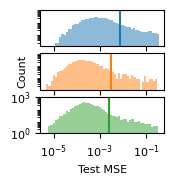

In [3]:
test_losses = np.load("data_for_figures/histogram.npz")
print(test_losses)

fig, axs = plt.subplots(3,1, figsize=(1.6,1.6), sharex=True)

for i, model_name in enumerate(["MLP", "MLP-A", "EMLP"]):
    ax = axs[i]
    ax.hist(np.log10(test_losses[model_name]), label=model_name, color=f"C{i}", bins=51, alpha=0.5)
    ax.axvline(np.log10(np.mean(test_losses[model_name])), color=f"C{i}")
    ax.set_ylim(1, 1000)
    ax.set_yscale("log")
    ax.set_yticks([])

axs[1].set_ylabel("Count", fontsize=8)
axs[2].set_xticks([-5, -3, -1], ["$10^{-5}$", "$10^{-3}$", "$10^{-1}$"], fontsize=8)
axs[2].set_yticks([1, 1000], ["$10^0$", "$10^3$"], fontsize=8)

ax.set_xlabel("Test MSE", fontsize=8)

# Selection rules

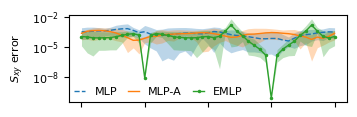

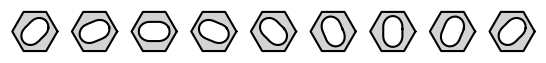

In [4]:
S_xy_errors = np.load("data_for_figures/selection_rules.npz")

fig, ax = plt.subplots(1,1, figsize=(3.4, 1))

# Designs to simulate
theta = 2 * np.pi * (np.arange(12)+0.5)/12
designs = []
steps = 5 + 4 * 10
for i in range(steps):
    designs.append(0.25 + 0.5 * np.cos(1.5*np.pi + 2*theta + 2*np.pi * (i) / (steps - 1)))

ax.fill_between(
    range(steps), 
    S_xy_errors["MLP"][2], 
    S_xy_errors["MLP"][3],
    color="C0", alpha=0.3, linewidth=0
)
ax.fill_between(
    range(steps), 
    S_xy_errors["MLP-A"][2],
    S_xy_errors["MLP-A"][3],
    color="C1", alpha=0.3, linewidth=0
)
ax.fill_between(
    range(steps), 
    S_xy_errors["EMLP"][2],
    S_xy_errors["EMLP"][3], 
    color="C2", alpha=0.3, linewidth=0
)
ax.plot(S_xy_errors["MLP"][0], "C0--", label="MLP", linewidth=1, markersize=3)
ax.plot(S_xy_errors["MLP-A"][0], "C1-", label="MLP-A", linewidth=1, markersize=3)
ax.plot(S_xy_errors["EMLP"][0], "C2.-", label="EMLP", linewidth=1, markersize=3)

ax.set_yscale("log")
ax.set_ylabel("$S_{xy}$ error", fontsize=8)
ax.set_xticks([0, 11, 22, 33, 44])
ax.set_xticklabels([])
ax.tick_params(axis='both', labelsize=8)
ax.legend(ncols=3, loc="lower left", borderpad=0, labelspacing=0, handlelength=1, fontsize=8, columnspacing=1, frameon=False)
fig.tight_layout(pad=0.1)


# Plot subset of designs for axis
from parameterization import visualize
designs = []
steps = 5 + 4 * 1
fig, axs = plt.subplots(1, steps, figsize=(6.8, 2))
for i, ax in enumerate(axs):
    design = 0.25 + 0.5 * np.cos(1.5*np.pi + 2*theta + 2*np.pi * (i) / (steps - 1))
    visualize(ax, design)